# CS206 Assignment 3
# Juliano Siloto Assine - 28406942

NLA Textbook Problem 29.1 - items a, b, c




### A) Write a ```tridiag(A)``` function that computes the hessenberg form 
### Apply the program to ```A = scipy.linalg.hilbert(4)```

In [1]:
import numpy as np
import scipy.linalg

def tridiag(A):
  R = A.copy()
  W = np.zeros(A.shape)
  for k in range(R.shape[1]-1):
    X = R[k+1:, k].copy()
    e = np.zeros(R.shape[0]-k-1)
    e[0] = 1.0
    vk = np.sign(X[0])*np.linalg.norm(X)*e + X
    vk = vk/np.linalg.norm(vk)
    R[k+1:, k:] = R[k+1:, k:]+ np.outer(-2*vk, vk.T.dot(R[k+1:, k:]))
    R[:, k+1:] = R[:, k+1:]+ np.outer(R[:, k+1:].dot(vk.T), -2*vk)

  for i in range(R.shape[0]):
    for j in range(R.shape[1]):
      if abs(i-j)>1:
        R[i, j] = 0
  return R

A = scipy.linalg.hilbert(4)
print(A)
print("Tridiagnoal form from my alg")
R = tridiag(A)
print(R)
R = scipy.linalg.hessenberg(A)
print("Tridiagnoal form from my scipy")
print(R)

[[1.         0.5        0.33333333 0.25      ]
 [0.5        0.33333333 0.25       0.2       ]
 [0.33333333 0.25       0.2        0.16666667]
 [0.25       0.2        0.16666667 0.14285714]]
Tridiagnoal form from my alg
[[ 1.00000000e+00 -6.50854140e-01  0.00000000e+00  0.00000000e+00]
 [-6.50854140e-01  6.50585480e-01  6.39118800e-02  0.00000000e+00]
 [ 0.00000000e+00  6.39118800e-02  2.53201434e-02  1.16520804e-03]
 [ 0.00000000e+00  0.00000000e+00  1.16520804e-03  2.84852680e-04]]
Tridiagnoal form from my scipy
[[ 1.00000000e+00 -6.50854140e-01  0.00000000e+00  0.00000000e+00]
 [-6.50854140e-01  6.50585480e-01  6.39118800e-02 -1.38777878e-17]
 [ 0.00000000e+00  6.39118800e-02  2.53201434e-02 -1.16520804e-03]
 [ 0.00000000e+00  0.00000000e+00 -1.16520804e-03  2.84852680e-04]]


### B) Write a ```qralg(A)``` function that runs unshifted QR decomposition


In [2]:
def qralg(A):
  Z = A.copy()
  while True:
    Q, R,  = np.linalg.qr(Z, mode='reduced')
    Z = R.dot(Q)
    for i in range(Z.shape[0]):
      for j in range(Z.shape[1]):
        if abs(i-j)>1:
          Z[i, j] = 0
    if abs(Z[-1, -2]) < 1e-12:
      break
  return Z

A = scipy.linalg.hilbert(4)
# print(A)
R = qralg(A)
print(R)


[[1.50020163e+00 2.00608240e-06 0.00000000e+00 0.00000000e+00]
 [2.00608240e-06 1.69171258e-01 8.00144939e-10 0.00000000e+00]
 [0.00000000e+00 8.00144915e-10 6.72100007e-03 7.52228411e-14]
 [0.00000000e+00 0.00000000e+00 7.52271739e-14 9.65906904e-05]]


### C) Write a program that calls ```tridiag(A)``` and ```qralg(A)``` to obtain one eigenvalue, does the same process iteratively on a submatrix and so on untill all eigenvalyes are found

Eigenvalues from my alg:  [1.500214280059243, 0.16914122022144998, 0.0067382736057606946, 9.670230402259938e-05]
Eigenvalues from my scipy:  [1.50021428e+00 1.69141220e-01 6.73827361e-03 9.67023040e-05]


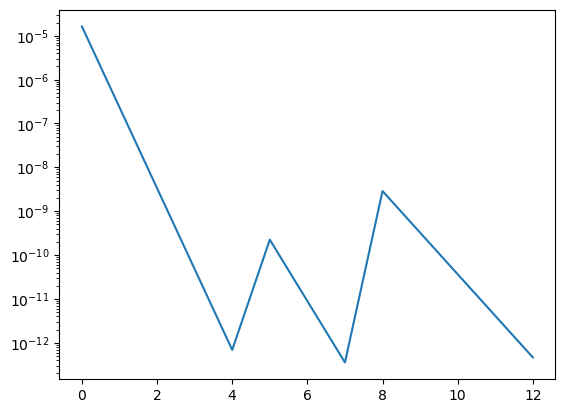

In [3]:
from numpy.linalg.linalg import eig
from numpy.linalg import qr
import matplotlib.pyplot as plt


def qralg2(A):
  Z = A.copy()
  error_list = []
  while True:
    Q, R,  = np.linalg.qr(Z, mode='reduced')
    Z = R.dot(Q)
    error = abs(Z[-1, -2])
    error_list.append(error)
    if error < 1e-12:
      break

  return Z, error_list


def eigenvalues(A):
  Z = A.copy()
  eigen = []
  errors = []
  Z = tridiag(Z)
  for i in range(Z.shape[0]):
    if(Z.shape[0]) == 1:
      eigen.append(Z[0, 0])
      break
    Z, error_list = qralg2(Z)
    eigen.append(Z[-1, -1])
    errors += error_list
    Z = Z[:-1, :-1]
  
  return eigen, errors
  

A = scipy.linalg.hilbert(4)
eigen, errors = eigenvalues(A)
print("Eigenvalues from my alg: ", eigen[::-1])

eigen, _ = scipy.linalg.eig(A)
print("Eigenvalues from my scipy: ",abs(eigen))

plt.semilogy(errors)